In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [50]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [51]:
X[1].shape

(50, 50)

In [52]:
X[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
print(X[0],y[0])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 1


Text(0.5, 1.0, '5')

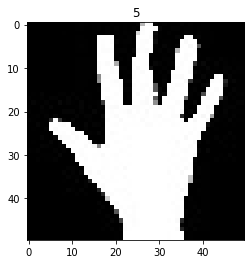

In [55]:
plt.imshow(X[405],cmap='binary_r')
plt.title(y[405])

In [56]:
X = X/255.0

In [57]:
y = np.array(y)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
X_train.shape

(16800, 50, 50)

In [61]:
X_train = X_train.reshape(-1,50,50,1)

In [63]:
X_train.shape

(16800, 50, 50, 1)

In [71]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(50, 50, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train,y_train,batch_size=64,epochs=5)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)             

In [72]:
X_test = X_test.reshape(-1,50,50,1)

In [181]:
y_predict = model.predict(X_test)

In [183]:
print(y_test[759],np.argmax(y_predict[759]))

3 3


In [115]:
'''from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_predict))'''




'from sklearn.metrics import classification_report\nfrom sklearn.metrics import confusion_matrix\n\nprint(classification_report(y_test,y_predict))'

In [ ]:
#print(confusion_matrix(y_test,predictions))

In [180]:
scores = model.evaluate(X_test,y_test,batch_size=64)
print("test loss, test acc:", scores)

113/113 [==============================] - 4s 38ms/step - loss: 0.0212 - accuracy: 0.9956
test loss, test acc: [0.0211514700204134, 0.995555579662323]


In [ ]:
model.save('cnn_model_keras.h5')

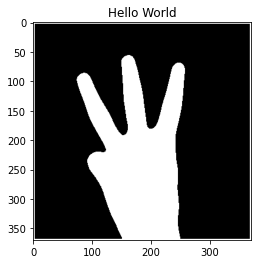

In [174]:
cap = cv2.VideoCapture(0)

while True:
    _,frame = cap.read()
    blur = cv2.GaussianBlur(frame,(5,5),0)
    blur = cv2.medianBlur(blur, 11)

    framecopy = frame.copy()
    cv2.rectangle(blur,(0,0),(370,370),255,4)
    blur = blur[0:370,0:370]

    #img = blur[0:370,0:370]
    imghsv = cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
     
    imgray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
    imgraycopy = imgray.copy()
    _,mask = cv2.threshold(imgray,80,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cnts,s = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(framecopy,cnts,-1,(0,255,0 ),3)
    
    
    cv2.imshow('frame',framecopy)
    cv2.imshow('mask',mask)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

plt.imshow(mask,cmap='binary_r')
plt.title('Hello World')
plt.show()

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50)


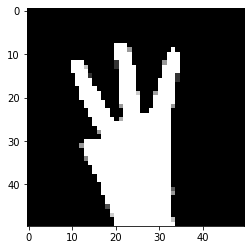

In [175]:
user_img = cv2.resize(mask,(50,50))
print(user_img.shape)
plt.imshow(user_img,cmap='binary_r')
plt.show()


In [176]:
cv2.imwrite('C:/Users/abdul/Desktop/proj code/test_img.jpg',user_img)

True

(1, 50, 50, 1)

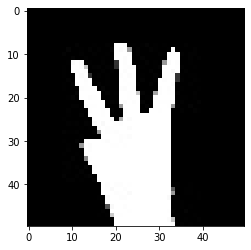

In [185]:
#testing captured image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('C:/Users/abdul/Desktop/proj code/test_img.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
image = image.reshape(-1,50,50,1)
image.shape

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


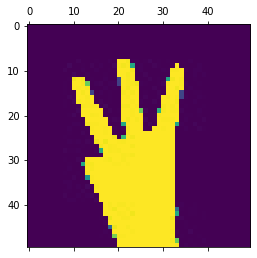

In [188]:
plt.matshow(image.reshape(50,50))
print(model.predict(image))